In [3]:
import math
import numpy
from matplotlib import pyplot

Code to genertae meshgrid for further computations

In [4]:
N = 50 #number of mesh points in each direction
x_start, x_end = -2.0, 2.0 #x limits
y_start, y_end = -1.0, 1.0 #y limits
x = numpy.linspace(x_start, x_end, N) # generate x array
y = numpy.linspace(y_start, y_end, N) #generate y array
X, Y = numpy.meshgrid(x,y) #generate mesh
X, Y


(array([[-2.        , -1.91836735, -1.83673469, ...,  1.83673469,
          1.91836735,  2.        ],
        [-2.        , -1.91836735, -1.83673469, ...,  1.83673469,
          1.91836735,  2.        ],
        [-2.        , -1.91836735, -1.83673469, ...,  1.83673469,
          1.91836735,  2.        ],
        ..., 
        [-2.        , -1.91836735, -1.83673469, ...,  1.83673469,
          1.91836735,  2.        ],
        [-2.        , -1.91836735, -1.83673469, ...,  1.83673469,
          1.91836735,  2.        ],
        [-2.        , -1.91836735, -1.83673469, ...,  1.83673469,
          1.91836735,  2.        ]]),
 array([[-1.        , -1.        , -1.        , ..., -1.        ,
         -1.        , -1.        ],
        [-0.95918367, -0.95918367, -0.95918367, ..., -0.95918367,
         -0.95918367, -0.95918367],
        [-0.91836735, -0.91836735, -0.91836735, ..., -0.91836735,
         -0.91836735, -0.91836735],
        ..., 
        [ 0.91836735,  0.91836735,  0.91836735, ...,

Plotting the mesh

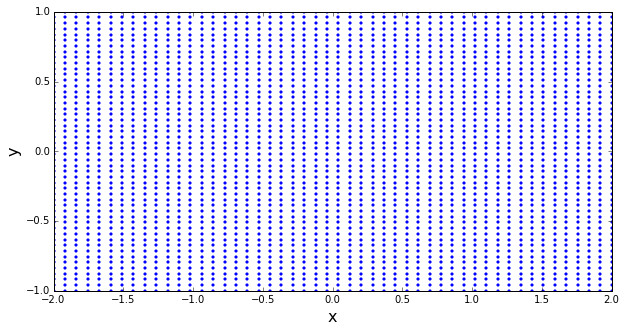

In [5]:
%matplotlib inline
size = 10
pyplot.figure(figsize=(size,(y_end - y_start)/(x_end - x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.scatter(X, Y, s=10, color ='blue', marker = 'o', linewidth=0)

Code to calculate and plot streamlines for a source 

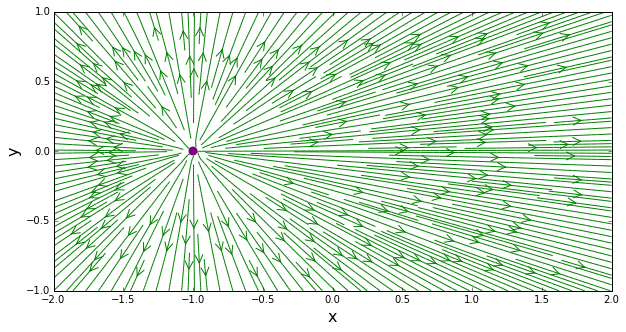

In [6]:
source_strength = 5.0
x_source, y_source = -1.0, 0.0
u_source = (source_strength/(2*math.pi))*((X-x_source)/((X-x_source)**2 + (Y-y_source)**2))
v_source = (source_strength/(2*math.pi))*((Y-y_source)/((X-x_source)**2 + (Y-y_source)**2))
size = 10.0
pyplot.figure(figsize=(size,(y_end - y_start)/(x_end - x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u_source, v_source, color='green', density=3, linewidth=1, arrowsize=2, arrowstyle='->')
pyplot.scatter(x_source, y_source, color='purple', s=80, marker='o', linewidth=0)

                                                

Code to calculate and plot streamlines for a  sink

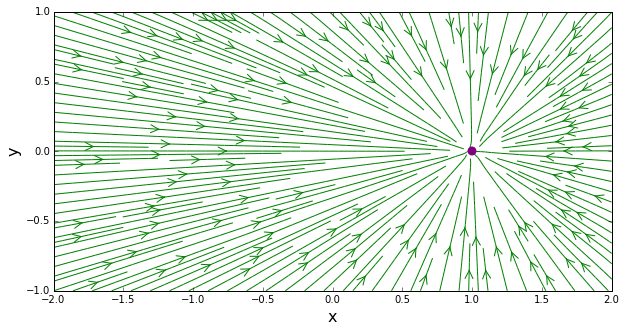

In [7]:
strength_sink = -5.0                     # strength of the sink
x_sink, y_sink = 1.0, 0.0                # location of the sink

# computes the velocity on the mesh grid
u_sink = strength_sink/(2*math.pi) * (X-x_sink)/((X-x_sink)**2 + (Y-y_sink)**2)
v_sink = strength_sink/(2*math.pi) * (Y-y_sink)/((X-x_sink)**2 + (Y-y_sink)**2)
# plots the streamlines
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u_sink, v_sink, color='green', density=2, linewidth=1, arrowsize=2, arrowstyle='->')
pyplot.scatter(x_sink, y_sink, color='purple', s=80, marker='o', linewidth=0);

Code to calculate and plot a source-sink pair

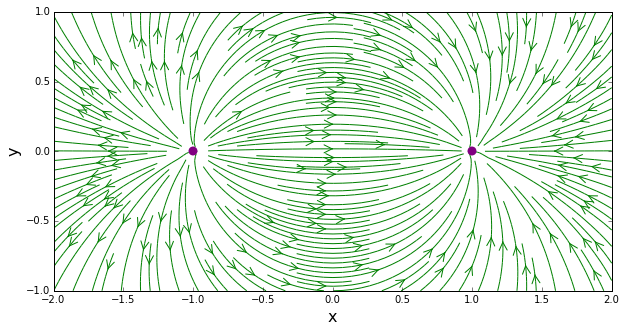

In [8]:
# computes the velocity of the pair source/sink by superposition
u_pair = u_source + u_sink
v_pair = v_source + v_sink

# plots the streamlines of the pair source/sink
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u_pair, v_pair, color='green', density=2.0, linewidth=1, arrowsize=2, arrowstyle='->')
pyplot.scatter([x_source, x_sink], [y_source, y_sink], 
            color='purple', s=80, marker='o', linewidth=0);

Code to calculate and plot potential lines for a source

<matplotlib.contour.QuadContourSet instance at 0x000000000E856808>

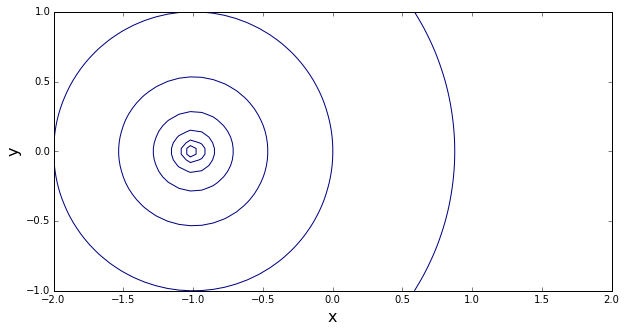

In [9]:
potential_source = (source_strength)/((2*numpy.pi))*(numpy.log(numpy.sqrt((X-x_source)**2 + (Y-y_source)**2)))
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.contour(X, Y, potential_source, colors ='navy', linestyles='solid')


Code to calculate and plot potential lines for a sink

<matplotlib.contour.QuadContourSet instance at 0x000000000ECB2E08>

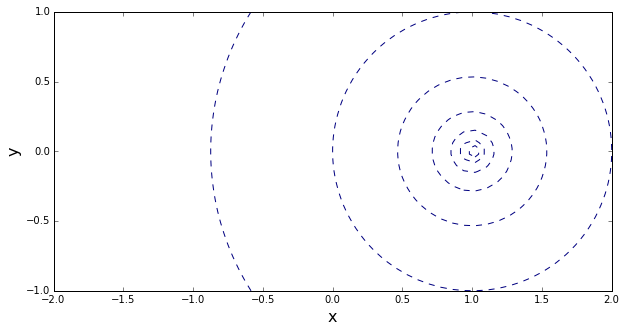

In [10]:
potential_sink = (strength_sink)/((2*numpy.pi))*(numpy.log(numpy.sqrt((X-x_sink)**2 + (Y-y_sink)**2)))
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.contour(X, Y, potential_sink, colors ='navy', linestyles='dashed')

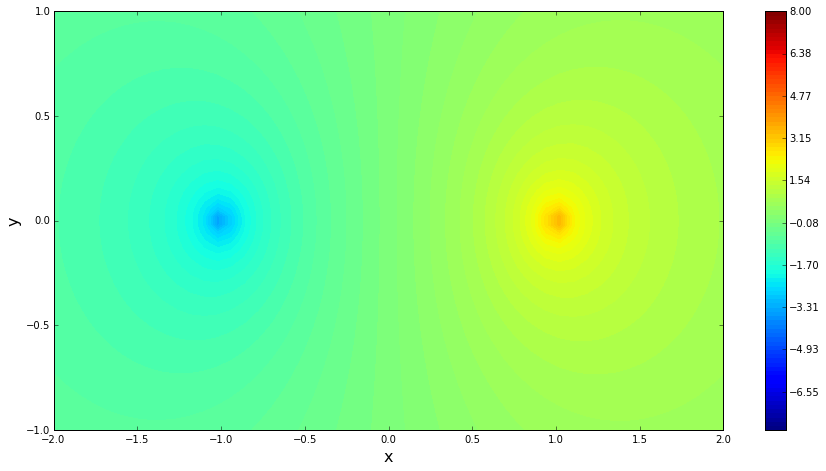

In [33]:
potential_pair = potential_source + potential_sink
size = 15
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
levels = numpy.linspace(-8, 8, 100)
CS = pyplot.contourf(X, Y, potential_pair, levels)
cbar = pyplot.colorbar(CS)